In [2]:

import pandas as pd
import os

df = pd.read_csv(os.path.join('data', 'workout', 'Workout_Data1.csv'))
df.head(5)

,Unnamed: 0,Exercise Plan,ExerciseType,Difficulty,Total Plan Duration (minutes),Calories Burned (Plan),Target Muscle Group,Gender,Height (cm),Age,Weight (kg),BMI,Knee Pain,Back Pain,Diabetes,Heart Disease,Hypertension
0,0,"Plank, Lunges, Russian Twists, Burpees, Sit-up...",Strength,Beginner,35,544.0,"Core (Abdominals, Lower Back), Quadriceps, Ham...",Female,157,24,56,22.857097,0,1,0,0,0
1,1,"Plank, Dumbbell Rows, Jumping Jacks, Lunges, B...",Cardio,Beginner,50,544.0,"Core (Abdominals, Lower Back), Back, Biceps, F...",Male,193,50,99,26.632088,0,1,0,0,0
2,2,"Squats, Sit-ups, Calf Raises, Bicep Curls, Leg...",Flexibility,Advanced,70,744.0,"Quadriceps, Hamstrings, Glutes, Core, Calves, ...",Male,199,45,117,29.749211,0,1,1,0,0
3,3,"Deadlifts, Bicep Curls, Box Jumps, Plank Jacks...",Cardio,Advanced,60,900.0,"Back, Glutes, Hamstrings, Biceps, Forearms, Le...",Male,150,49,43,19.528223,0,1,1,0,0
4,4,"Lateral Raises, Calf Raises, Push-ups, Bench P...",Flexibility,Advanced,60,768.0,"Shoulders, Calves, Chest, Shoulders, Triceps, ...",Female,178,51,86,27.382191,1,1,0,0,0


In [3]:
df.insert(0, 'ID', df.index)
df.head(5)

,ID,Unnamed: 0,Exercise Plan,ExerciseType,Difficulty,Total Plan Duration (minutes),Calories Burned (Plan),Target Muscle Group,Gender,Height (cm),Age,Weight (kg),BMI,Knee Pain,Back Pain,Diabetes,Heart Disease,Hypertension
0,0,0,"Plank, Lunges, Russian Twists, Burpees, Sit-up...",Strength,Beginner,35,544.0,"Core (Abdominals, Lower Back), Quadriceps, Ham...",Female,157,24,56,22.857097,0,1,0,0,0
1,1,1,"Plank, Dumbbell Rows, Jumping Jacks, Lunges, B...",Cardio,Beginner,50,544.0,"Core (Abdominals, Lower Back), Back, Biceps, F...",Male,193,50,99,26.632088,0,1,0,0,0
2,2,2,"Squats, Sit-ups, Calf Raises, Bicep Curls, Leg...",Flexibility,Advanced,70,744.0,"Quadriceps, Hamstrings, Glutes, Core, Calves, ...",Male,199,45,117,29.749211,0,1,1,0,0
3,3,3,"Deadlifts, Bicep Curls, Box Jumps, Plank Jacks...",Cardio,Advanced,60,900.0,"Back, Glutes, Hamstrings, Biceps, Forearms, Le...",Male,150,49,43,19.528223,0,1,1,0,0
4,4,4,"Lateral Raises, Calf Raises, Push-ups, Bench P...",Flexibility,Advanced,60,768.0,"Shoulders, Calves, Chest, Shoulders, Triceps, ...",Female,178,51,86,27.382191,1,1,0,0,0


In [4]:
# Calculate min and max
import numpy as np


min_value = np.min(df['ID'])
max_value = np.max(df['ID'])

# Standardize the data
normalized_data = (df['ID'] - min_value) / (max_value - min_value)
df['ID']=normalized_data

df.columns

Index(['ID', 'Unnamed: 0', 'Exercise Plan', 'ExerciseType', 'Difficulty',
       'Total Plan Duration (minutes)', 'Calories Burned (Plan)',
       'Target Muscle Group', 'Gender', 'Height (cm)', 'Age', 'Weight (kg)',
       'BMI', 'Knee Pain', 'Back Pain', 'Diabetes', 'Heart Disease',
       'Hypertension'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
df1 = df[['ID','Gender', 'Knee Pain', 'Back Pain', 'Diabetes', 'Heart Disease','Hypertension']]
label_encoder = LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
df1

C:\Users\Is Laptop\AppData\Local\Temp\ipykernel_19620\173019092.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Gender'] = label_encoder.fit_transform(df1['Gender'])


,ID,Gender,Knee Pain,Back Pain,Diabetes,Heart Disease,Hypertension
0,0.000000,0,0,1,0,0,0
1,0.002506,1,0,1,0,0,0
2,0.005013,1,0,1,1,0,0
3,0.007519,1,0,1,1,0,0
4,0.010025,0,1,1,0,0,0
...,...,...,...,...,...,...,...
395,0.989975,1,0,0,0,0,1
396,0.992481,1,0,0,0,0,0
397,0.994987,1,1,0,1,0,0
398,0.997494,0,1,0,0,0,1


In [6]:
df2 = df[['ID', 'Exercise Plan', 'ExerciseType', 'Difficulty','Total Plan Duration (minutes)', 'Calories Burned (Plan)','Target Muscle Group', 'Height (cm)', 'Age', 'Weight (kg)','BMI']]
df2

,ID,Exercise Plan,ExerciseType,Difficulty,Total Plan Duration (minutes),Calories Burned (Plan),Target Muscle Group,Height (cm),Age,Weight (kg),BMI
0,0.000000,"Plank, Lunges, Russian Twists, Burpees, Sit-up...",Strength,Beginner,35,544.0,"Core (Abdominals, Lower Back), Quadriceps, Ham...",157,24,56,22.857097
1,0.002506,"Plank, Dumbbell Rows, Jumping Jacks, Lunges, B...",Cardio,Beginner,50,544.0,"Core (Abdominals, Lower Back), Back, Biceps, F...",193,50,99,26.632088
2,0.005013,"Squats, Sit-ups, Calf Raises, Bicep Curls, Leg...",Flexibility,Advanced,70,744.0,"Quadriceps, Hamstrings, Glutes, Core, Calves, ...",199,45,117,29.749211
3,0.007519,"Deadlifts, Bicep Curls, Box Jumps, Plank Jacks...",Cardio,Advanced,60,900.0,"Back, Glutes, Hamstrings, Biceps, Forearms, Le...",150,49,43,19.528223
4,0.010025,"Lateral Raises, Calf Raises, Push-ups, Bench P...",Flexibility,Advanced,60,768.0,"Shoulders, Calves, Chest, Shoulders, Triceps, ...",178,51,86,27.382191
...,...,...,...,...,...,...,...,...,...,...,...
395,0.989975,"Bench Press, Plank Jacks, Sit-ups, Bicep Curls...",Cardio,Intermediate,60,710.0,"Chest, Shoulders, Triceps, Core, Cardio, Core,...",162,46,53,20.382519
396,0.992481,"Jumping Jacks, Lateral Raises, Bicep Curls, Bu...",Strength,Beginner,65,536.0,"Full Body (Cardio), Shoulders, Biceps, Forearm...",158,20,72,28.966427
397,0.994987,"Squats, Russian Twists, Lunges, Bench Press, M...",Cardio,Intermediate,55,770.0,"Quadriceps, Hamstrings, Glutes, Core (Obliques...",172,52,58,19.751178
398,0.997494,"Deadlifts, Leg Press, Burpees, Calf Raises, Ru...",Strength,Intermediate,75,770.0,"Back, Glutes, Hamstrings, Quadriceps, Hamstrin...",176,53,82,26.662217


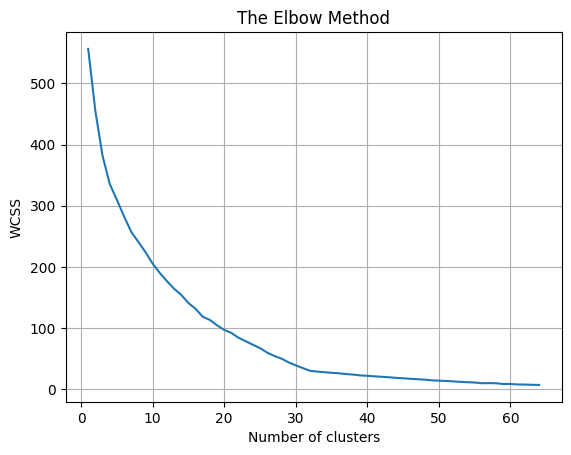

In [7]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different number of clusters
wcss = []
max_clusters = 64
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, max_clusters+1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [8]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

max_clusters = 64
silhouette_scores = []

for n_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(df1)
    silhouette_scores.append(silhouette_score(df1, cluster_labels))

best_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
best_clusters


34

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Build the model
kmeans = KMeans(n_clusters=34, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df1)

silhouette_avg = silhouette_score(df1, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Get cluster labels
cluster_labels = kmeans.labels_

cluster_labels

Silhouette Score: 0.6904207596789235


array([28, 20, 15, 15,  3,  3,  9, 33, 12, 31, 16, 30, 27, 24, 16, 10, 19,
       12, 13,  5, 11, 20, 12, 17, 15,  1, 18, 32,  3,  8, 17, 11,  9, 32,
       12, 18, 23, 11, 32,  3, 30, 33, 33, 13, 31, 24, 29, 19,  9, 18, 27,
       27,  2, 14,  4, 13, 24, 12, 22, 27,  3, 16, 21, 31,  0, 14, 10, 14,
       20, 24, 23,  3, 18, 14,  3,  4, 10, 27, 19, 14, 17,  1, 26, 20, 14,
       32,  9,  3, 14, 21, 14, 23, 28, 30,  3,  9,  4, 11, 17,  7, 31, 28,
        3, 10, 32, 12, 23, 12,  4, 24,  1, 14,  1,  3,  5, 21, 20,  8,  5,
       20, 19, 10,  5,  8,  9,  4,  7, 15, 26, 18, 15, 22, 20, 11,  0, 16,
       24, 13, 27, 19, 26, 29, 13, 20, 16, 10, 20,  9, 18, 10,  3,  3, 24,
       18,  0, 22, 13, 27,  8,  7,  2, 10, 32, 30, 19, 31, 22,  1,  3, 29,
       29, 26, 26, 12, 21,  5, 26, 12, 31, 11, 11, 14,  4, 10, 29, 13,  3,
       11, 15,  7,  7, 14,  4,  9, 30,  4, 24, 13,  1, 23, 25, 15,  4, 24,
       31, 16,  9, 22, 11,  7, 14, 13, 31, 18, 11, 19, 26, 30, 17, 17,  6,
       13, 21, 26, 14, 10

In [10]:
from collections import Counter

# Get counts for each cluster label
cluster_counts = Counter(clusters)

# Print the counts
print(f"Number of data points in each cluster:")
print(cluster_counts)

# (Optional) Print percentages
print(f"Percentage of data points in each cluster:")
for cluster, count in cluster_counts.items():
    percentage = count / len(df1) * 100
    print(f"Cluster {cluster}: {percentage:.2f}%")

Number of data points in each cluster:
Counter({9: 21, 24: 18, 7: 18, 21: 17, 18: 17, 10: 17, 4: 16, 13: 16, 3: 15, 14: 15, 23: 14, 8: 14, 16: 14, 12: 14, 5: 14, 19: 13, 6: 13, 1: 13, 0: 12, 17: 11, 2: 11, 20: 11, 11: 11, 15: 10, 22: 10, 27: 10, 25: 10, 26: 9, 29: 8, 28: 8})
Percentage of data points in each cluster:
Cluster 29: 2.00%
Cluster 17: 2.75%
Cluster 24: 4.50%
Cluster 9: 5.25%
Cluster 3: 3.75%
Cluster 15: 2.50%
Cluster 4: 4.00%
Cluster 22: 2.50%
Cluster 21: 4.25%
Cluster 2: 2.75%
Cluster 27: 2.50%
Cluster 20: 2.75%
Cluster 13: 4.00%
Cluster 23: 3.50%
Cluster 8: 3.50%
Cluster 14: 3.75%
Cluster 16: 3.50%
Cluster 12: 3.50%
Cluster 19: 3.25%
Cluster 6: 3.25%
Cluster 0: 3.00%
Cluster 28: 2.00%
Cluster 5: 3.50%
Cluster 7: 4.50%
Cluster 26: 2.25%
Cluster 18: 4.25%
Cluster 10: 4.25%
Cluster 11: 2.75%
Cluster 1: 3.25%
Cluster 25: 2.50%


In [11]:
cluster_2_indices = np.where(clusters == 0)[0]
cluster_2_data = df1.iloc[cluster_2_indices]
cluster_2_data

,ID,Gender,Knee Pain,Back Pain,Diabetes,Heart Disease,Hypertension
27,0.067669,1,1,0,0,0,0
33,0.082707,1,1,0,0,0,0
38,0.095238,1,1,0,0,0,0
85,0.213033,1,1,0,0,0,0
104,0.260652,1,1,0,0,0,0
162,0.406015,1,1,0,0,0,0
220,0.551378,1,1,0,0,0,0
307,0.769424,1,1,0,0,0,0
356,0.892231,1,1,0,0,0,0
369,0.924812,1,1,0,0,0,0


In [12]:
df3=df1.copy()
# Get cluster labels
cluster_labels = kmeans.labels_

df3['Cluster']=cluster_labels
df3

,ID,Gender,Knee Pain,Back Pain,Diabetes,Heart Disease,Hypertension,Cluster
0,0.000000,0,0,1,0,0,0,29
1,0.002506,1,0,1,0,0,0,17
2,0.005013,1,0,1,1,0,0,24
3,0.007519,1,0,1,1,0,0,24
4,0.010025,0,1,1,0,0,0,9
...,...,...,...,...,...,...,...,...
395,0.989975,1,0,0,0,0,1,18
396,0.992481,1,0,0,0,0,0,19
397,0.994987,1,1,0,1,0,0,13
398,0.997494,0,1,0,0,0,1,14


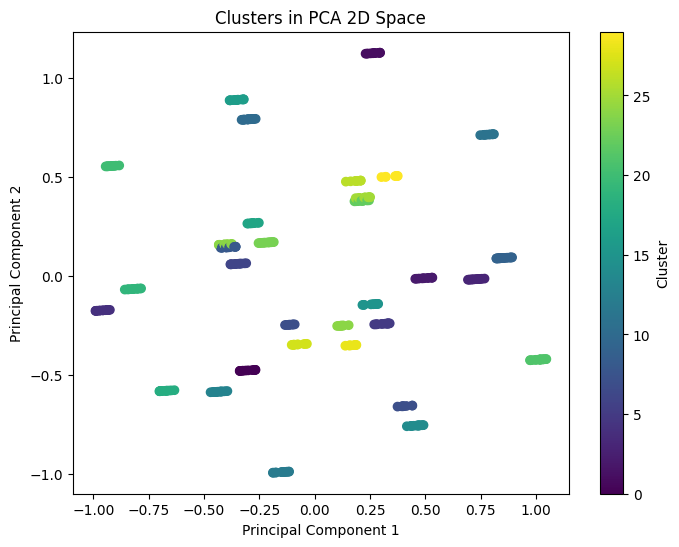

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA and fit the features selected
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df3.drop('Cluster', axis=1))

# Create a DataFrame with the two components
PCA_components = pd.DataFrame(principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate the clusters labels to the DataFrame
PCA_components['Cluster'] = df3['Cluster']

# Plot the clustered dataset
plt.figure(figsize=(8,6))
plt.scatter(PCA_components['Principal Component 1'], PCA_components['Principal Component 2'], c=PCA_components['Cluster'])
plt.title('Clusters in PCA 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [14]:
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter(PCA_components, x='Principal Component 1', y='Principal Component 2', color='Cluster',
                 title='Clusters in PCA 2D Space', labels={'Principal Component 1': 'PC1', 'Principal Component 2': 'PC2'},
                 color_continuous_scale='Viridis')

# Add colorbar
fig.update_layout(coloraxis_colorbar=dict(title='Cluster'))

# Show the plot
fig.show()


ModuleNotFoundError: No module named 'plotly'

In [ ]:
import joblib
import os

# Save the KMeans model to a file
joblib.dump(kmeans, os.path.join('models', 'workouts_model.pkl'))

['models\\workouts_model.pkl']

In [ ]:
import joblib
 # Load the model from the file
loaded_model = joblib.load(os.path.join('models', 'workouts_model.pkl'))

# # Use the loaded model for prediction
predictions = loaded_model.predict([[0,0,1,0,1,0,1]])
predictions

array([8])

In [ ]:
cluster_labels = kmeans.labels_

df2['Cluster']=cluster_labels
df2

,ID,Exercise Plan,ExerciseType,Difficulty,Total Plan Duration (minutes),Calories Burned (Plan),Target Muscle Group,Height (cm),Age,Weight (kg),BMI,Cluster
0,0.000000,"Plank, Lunges, Russian Twists, Burpees, Sit-up...",Strength,Beginner,35,544.0,"Core (Abdominals, Lower Back), Quadriceps, Ham...",157,24,56,22.857097,28
1,0.002506,"Plank, Dumbbell Rows, Jumping Jacks, Lunges, B...",Cardio,Beginner,50,544.0,"Core (Abdominals, Lower Back), Back, Biceps, F...",193,50,99,26.632088,20
2,0.005013,"Squats, Sit-ups, Calf Raises, Bicep Curls, Leg...",Flexibility,Advanced,70,744.0,"Quadriceps, Hamstrings, Glutes, Core, Calves, ...",199,45,117,29.749211,15
3,0.007519,"Deadlifts, Bicep Curls, Box Jumps, Plank Jacks...",Cardio,Advanced,60,900.0,"Back, Glutes, Hamstrings, Biceps, Forearms, Le...",150,49,43,19.528223,15
4,0.010025,"Lateral Raises, Calf Raises, Push-ups, Bench P...",Flexibility,Advanced,60,768.0,"Shoulders, Calves, Chest, Shoulders, Triceps, ...",178,51,86,27.382191,3
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.989975,"Bench Press, Plank Jacks, Sit-ups, Bicep Curls...",Cardio,Intermediate,60,710.0,"Chest, Shoulders, Triceps, Core, Cardio, Core,...",162,46,53,20.382519,14
396,0.992481,"Jumping Jacks, Lateral Raises, Bicep Curls, Bu...",Strength,Beginner,65,536.0,"Full Body (Cardio), Shoulders, Biceps, Forearm...",158,20,72,28.966427,1
397,0.994987,"Squats, Russian Twists, Lunges, Bench Press, M...",Cardio,Intermediate,55,770.0,"Quadriceps, Hamstrings, Glutes, Core (Obliques...",172,52,58,19.751178,10
398,0.997494,"Deadlifts, Leg Press, Burpees, Calf Raises, Ru...",Strength,Intermediate,75,770.0,"Back, Glutes, Hamstrings, Quadriceps, Hamstrin...",176,53,82,26.662217,5


In [ ]:
df2.to_csv(os.path.join('data','workout', 'Clusterd_Workout_Data.csv'))